# Auto Co relation and partial Co relation

**Auto Correlation Function**

Auto Correlation is a very important step in Time Series Model Building

In this step , the data is correlated with its lag values to see how well the current value is related to the previous values

Auto Correlation Function is used for quantifying this relationship

In Time Series, the same data point is observed at different time intervals, hence the correlation of the current value with the previous values is known as Auto Correlation or Serial Correlation.

If you take a lag of 1 time step and correlate the lag values with the actual values , you get the auto correlation of lag 1

This process can be repeated for multiple lags

The ACF plot is a very useful graph while performing Time Series Modeling

It tell the correlation value for each lag

An ideal ACF plot will decay exponentially

Depending on the ACF plot value , you can decide to stop at any given lag

(ideally closer the lag, higher the correlation)

In [1]:
import pandas as pd
import requests
link = 'https://finance.yahoo.com/quote/AAPL/history?period1=1420065000&period2=1609453799&interval=1d&frequency=1d&filter=history'
r = requests.get(link, headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'})
data = pd.read_html(r.text)[0]
df =pd.DataFrame(data)

for i in range(len(df)):
  try:
    float(df.Open[i])
  except:
    print(i)

38
87
100


In [2]:
df.drop([38,87,100],inplace=True)

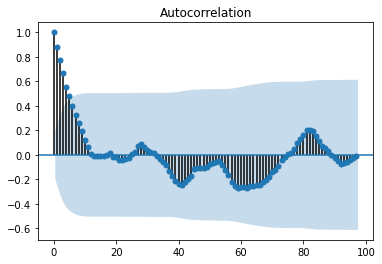

In [3]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Close*'], lags=97)
pyplot.show()

The ACF Plot has lag number in the x axis and the correlation value for the specific lag in y axis.

ACF value lies between - 1 and + 1

ACF is unitless

It helps the analyst in getting how each lag value is correlated

Fitting ACF is the first step during Model Building

Depending on the pattern you can decide what should be the order of the Auto Regression process

**PACF**

Partial Auto Correlation is another important step in the Time Series Modeling Process

- The partial auto correlation at any given lag k is the correlation obtained after cancelling the effect of correlations due to terms at shorter lags.

- In simple terms , in partial auto correlation , the effects due to intermediate terms are nullified to determine the correlation

**Determining the PAC value**

If you have a time series that is represented by [yt , yt-1 , yt-2 , .... yt-s]

If you want to determine the Partial Auto Correlation between yt and yt-s then you have to nullify the effect of all intermediate terms to get the PACF value


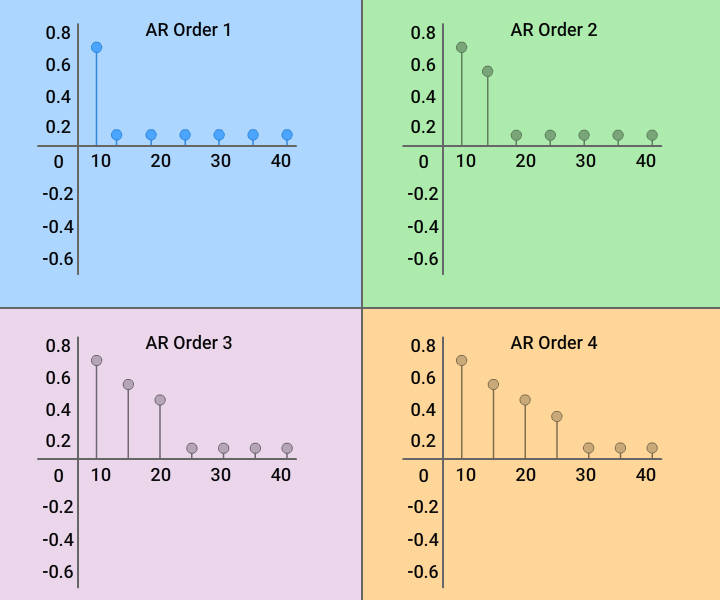

The PACF values when plotted can help in determining the order of the Auto Regressive Process.

The number of significant correlations will determine the order of the AR process.

The picture above shows a sample PACF plot.

Top Left Plot has one significant correlation meaning the order of the AR process is 1.

Top Right Plot has two and so on ..

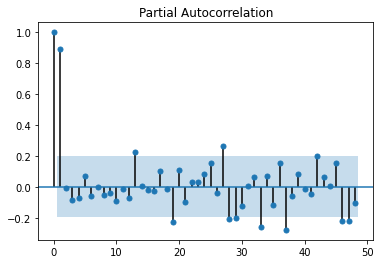

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Close*'],lags=48)
pyplot.show()

The PACF plot has lag on X axis and correlation value on Y axis.

Reading the PACF Plot we will understand the number of significant lags to determine the order of AR Process.

From the plot in the previous card , it is evident that the order of AR will be 2 for the time series.

In [5]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
print("ACF first 5 lags: ", acf(df['Close*'], nlags=5))
print("PACF first 5 lags: ", pacf(df['Close*'], nlags=5))

ACF first 5 lags:  [1.         0.8809121  0.77501513 0.66515257 0.55608743 0.47631256]
PACF first 5 lags:  [ 1.          0.88999367 -0.00446085 -0.08245039 -0.0716818   0.07162715]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


# Auto Regressive Model (AR)

Regression is the process of predicting one variable from another .

In Time Series , the data points collected are from the same observation.

Here the past observations are used for predicting the future values.

This process of regressing the past values to get the future values is known as Auto Regression.


The outcome of the model fitting will be determining the coef values.

Once the coef values are determined they can be used to predict the future values based on the current and past data.

The lag values should help in predicting the current and the future values

Stronger the correlation between the current and the past values, more robust the predictions from Auto Regression

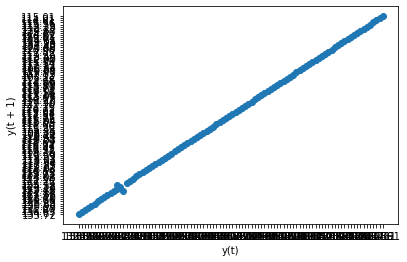

In [28]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

X = df['Close*'].values

train, test = X[1:len(X)-10], X[len(X)-10:]

lag_plot( df['Close*'])

plt.show()

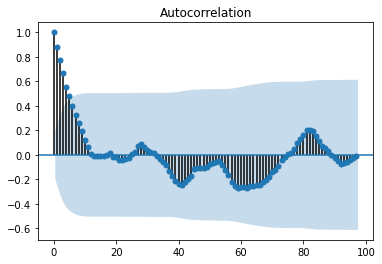

In [29]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf( df['Close*'],lags = 97)

plt.show()

In [30]:
train  = list(map(lambda x: int(float(x)), list(train)))
test  = list(map(lambda x: int(float(x)), list(test)))

In [31]:
model = AR(train)

model_fit = model.fit()

print('Lag: %s' % model_fit.k_ar)

print('Coefficients: %s' % model_fit.params)

Lag: 12
Coefficients: [ 2.07604012e+01  7.80680854e-01  1.05774191e-01 -6.73894483e-02
 -7.88351671e-03  7.26798396e-02 -9.72725916e-02  4.49624693e-02
  4.54014802e-02  1.39730189e-01 -9.15563863e-02  6.85754689e-02
 -1.69730455e-01]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)


predicted=124.204698, expected=126.000000
predicted=123.090104, expected=124.000000
predicted=123.627432, expected=125.000000
predicted=122.977747, expected=124.000000
predicted=126.013490, expected=118.000000
predicted=125.734626, expected=115.000000
predicted=125.472889, expected=115.000000
predicted=123.294541, expected=114.000000
predicted=121.120856, expected=114.000000
predicted=119.773806, expected=115.000000
Test MSE: 45.599


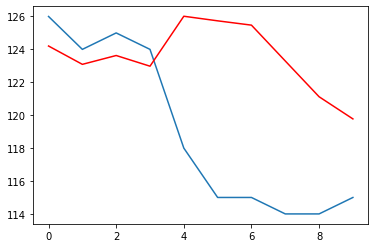

In [32]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

for i in range(len(predictions)):

    print('predicted=%f, expected=%f' % (predictions[i], test[i]))

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# plot results

plt.plot(test)

plt.plot(predictions, color='red')

plt.show()

In the above code, we are performing forecasting for the time series based on the length.

We are also viewing the Mean Square Error and plotting the actuals vs predicted values.

# Moving Average Process

Moving Average is a smoothing technique for reducing the noise in the Time Series Data

It is used for exposing the signal that is in-between the noise

The values are averaged at different time windows

In Centered Moving average , the average is calculated for time steps before and after the given time step

cma(t) = average(obs(t-1), obs(t), obs(t+1))


**Centered Moving Average Properties**


This method requires the know how of the future values to calculate the average.

This technique is used for detrending and removing any seasonal effects on Time Series Data.

This is not very useful for forecasting.


**Trailing Moving Average**


Trailing Moving Average uses historical observations for determining the future observation.

trail_moving_average(t) = average(obs(t-2), obs(t-1), obs(t))

In [33]:
from pandas import Series
seriesData = Series(df['Close*'].values)
rolling = seriesData.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.head(10)

# In the above code , we are keeping the window size of 3 and moving across the time series to calculate the arithmetic mean.
# Results below. The first two observations are Nan.

0           NaN
1           NaN
2    133.760000
3    135.093333
4    134.510000
5    133.206667
6    131.603333
7    130.356667
8    128.923333
9    127.863333
dtype: float64

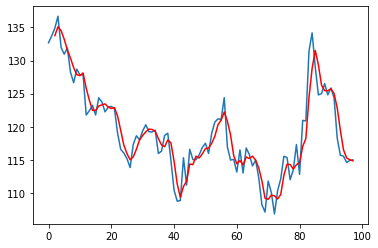

In [43]:
pd.to_numeric(seriesData.head(98)).plot()

rolling_mean.head(100).plot(color='red')

plt.show()


# The Actual data is in Blue and the rolling mean is in Red .

# The data is smoother now

Moving Average can be used for prediction

It is not a very effective way to predict but can still be used to get a naive estimate

The assumption we make is that the trend and seasonal components are nullified

This can be used in a Walk Forward Manner

In [48]:
from numpy import mean



X = df['Close*'].values

window = 3

history = [X[i] for i in range(window)]

test = [X[i] for i in range(window, len(X))]

predictions = list()

# walk forward over time steps in test

for t in range(len(test)):

	length = len(history)

	yhat = mean( pd.to_numeric([history[i] for i in range(length-window,length)]))

	obs = test[t]

	predictions.append(yhat)

	history.append(obs)

#	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

# In the above code , we are forecasting using Moving Average process. 
# We are traversing along the time series to create the forecast values.

# Finally we are getting the Mean Square Error.

Test MSE: 12.379


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:95: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


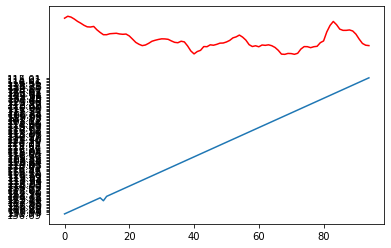

In [49]:
plt.plot(test)

plt.plot(predictions, color='red')

plt.show()

# In the above graph the actual values are in Blue and the predicted values are in Red.

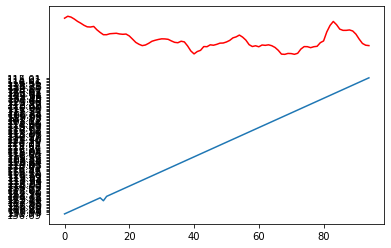

In [50]:
# zoom plot

plt.plot(test[0:100])

plt.plot(predictions[0:100], color='red')

plt.show()


# ARMA

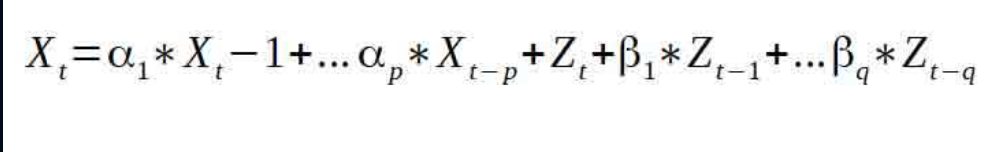

The above equation represents a typical ARMA process.

Alpha represent all the Auto Regression Terms and Beta represents all the Moving Average Terms.

ARMA stands for Auto Regressive Moving Average.

It is a combination of AR and MA represented using the above equation.